# Smoothing and Splines
- **Purpose**: Approximate noisy data with smooth curves
- **scipy.interpolate**: UnivariateSpline, splrep/splev, BSpline
- **Key difference**: Smoothing ≠ Interpolation (doesn't pass through all points)

Key concepts:
- **Interpolation**: Exact fit through all points
- **Smoothing**: Approximate fit, reduces noise
- **Smoothing parameter s**: Controls fit tightness
- **B-splines**: Basis splines, flexible representation
- **Knots**: Control points for spline pieces

Real applications:
- **Sensor data**: Denoise measurements
- **Signal processing**: Smooth time series
- **Trend analysis**: Extract signal from noise
- **Data compression**: Represent data efficiently
- **Derivative estimation**: From noisy data

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
plt.style.use('seaborn-v0_8-darkgrid')

print("Smoothing and splines module loaded")

Smoothing and splines module loaded


## Interpolation vs Smoothing

**Interpolation** (s=0):
- Passes through every data point
- Captures all noise
- Can oscillate

**Smoothing** (s>0):
- Approximates data
- Reduces noise
- Smoother curve

**Parameter s**:
- s=0: Interpolation
- s>0: Smoothing (larger = smoother)
- s=None: Automatic based on noise estimate

Interpolation vs Smoothing
  Data: 50 points with noise (σ=0.3)
  True function: sin(x) + 0.5x



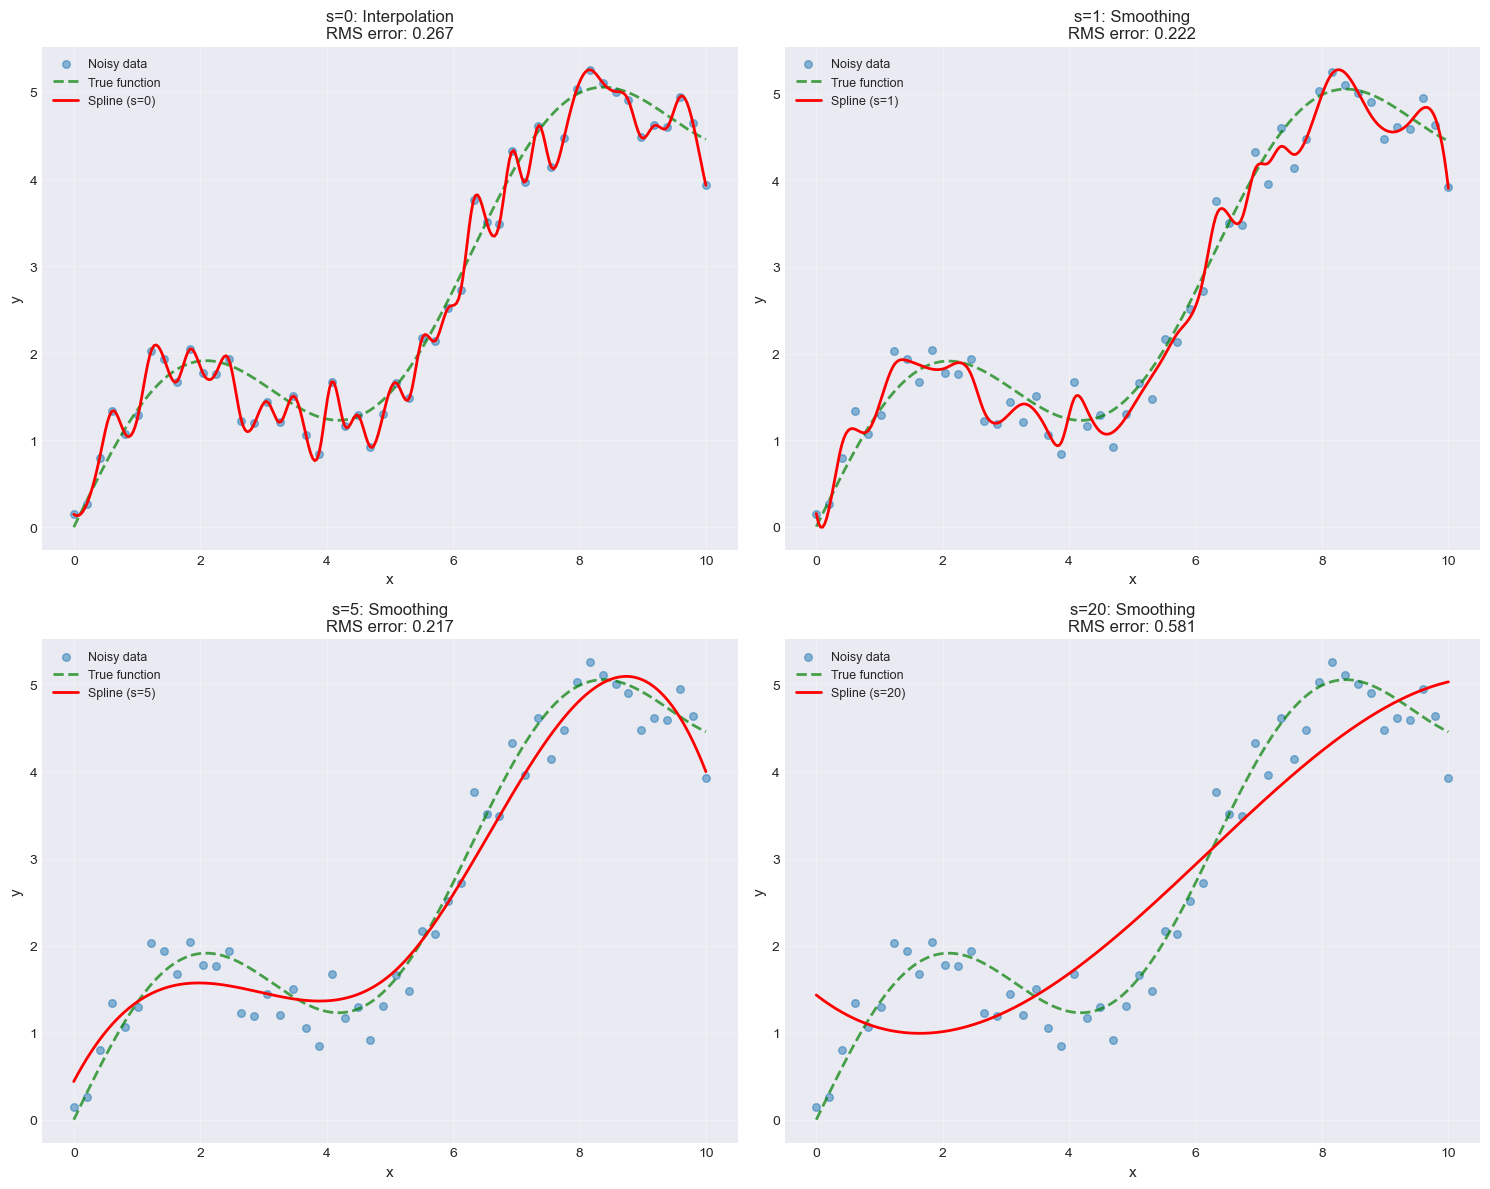

Observations:
  s=0: Fits all noise (oscillates)
  s=1: Slight smoothing
  s=5: Good balance (lowest error!)
  s=20: Over-smoothed (loses detail)

Optimal s balances fitting vs smoothing!


In [2]:
# Generate noisy data
np.random.seed(42)
x = np.linspace(0, 10, 50)
y_true = np.sin(x) + 0.5*x
noise = np.random.randn(50) * 0.3
y_noisy = y_true + noise

print("Interpolation vs Smoothing")
print(f"  Data: 50 points with noise (σ=0.3)")
print(f"  True function: sin(x) + 0.5x\n")

# Fine grid for plotting
x_fine = np.linspace(0, 10, 300)

# Different smoothing levels
s_values = [0, 1, 5, 20]  # s=0 is interpolation

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, s in enumerate(s_values):
    # UnivariateSpline with smoothing
    spl = interpolate.UnivariateSpline(x, y_noisy, s=s)
    y_smooth = spl(x_fine)
    
    # Calculate error from true function
    y_true_fine = np.sin(x_fine) + 0.5*x_fine
    rms_error = np.sqrt(np.mean((y_smooth - y_true_fine)**2))
    
    # Plot
    axes[i].scatter(x, y_noisy, alpha=0.5, s=30, label='Noisy data')
    axes[i].plot(x_fine, y_true_fine, 'g--', linewidth=2, 
                alpha=0.7, label='True function')
    axes[i].plot(x_fine, y_smooth, 'r-', linewidth=2,
                label=f'Spline (s={s})')
    
    title = f's={s}: ' + ('Interpolation' if s==0 else f'Smoothing')
    title += f'\nRMS error: {rms_error:.3f}'
    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlabel('x', fontsize=11)
    axes[i].set_ylabel('y', fontsize=11)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Observations:")
print("  s=0: Fits all noise (oscillates)")
print("  s=1: Slight smoothing")
print("  s=5: Good balance (lowest error!)")
print("  s=20: Over-smoothed (loses detail)")
print("\nOptimal s balances fitting vs smoothing!")

## UnivariateSpline: Main Smoothing Tool

**Function**: `UnivariateSpline(x, y, s=None, k=3)`

**Parameters**:
- `s`: Smoothing factor (None = automatic)
- `k`: Spline degree (1=linear, 3=cubic)
- `w`: Weights for each point

**Methods**:
- `spl(x)`: Evaluate spline
- `spl.derivative()`: Get derivative spline
- `spl.integral()`: Get integral spline
- `spl.roots()`: Find zeros

**Use when**: Noisy 1D data, need smooth approximation

UnivariateSpline Features
  Function: sin(x) with noise

Spline operations:
  Integral [0, 2π]: -0.1939 (true: 0)
  Roots found: 3
  Root locations: [0.019  3.0626 6.2157]
  True roots: 0, π, 2π = 0, 3.1416, 6.2832


ValueError: x and y must have same first dimension, but have shapes (300,) and (30,)

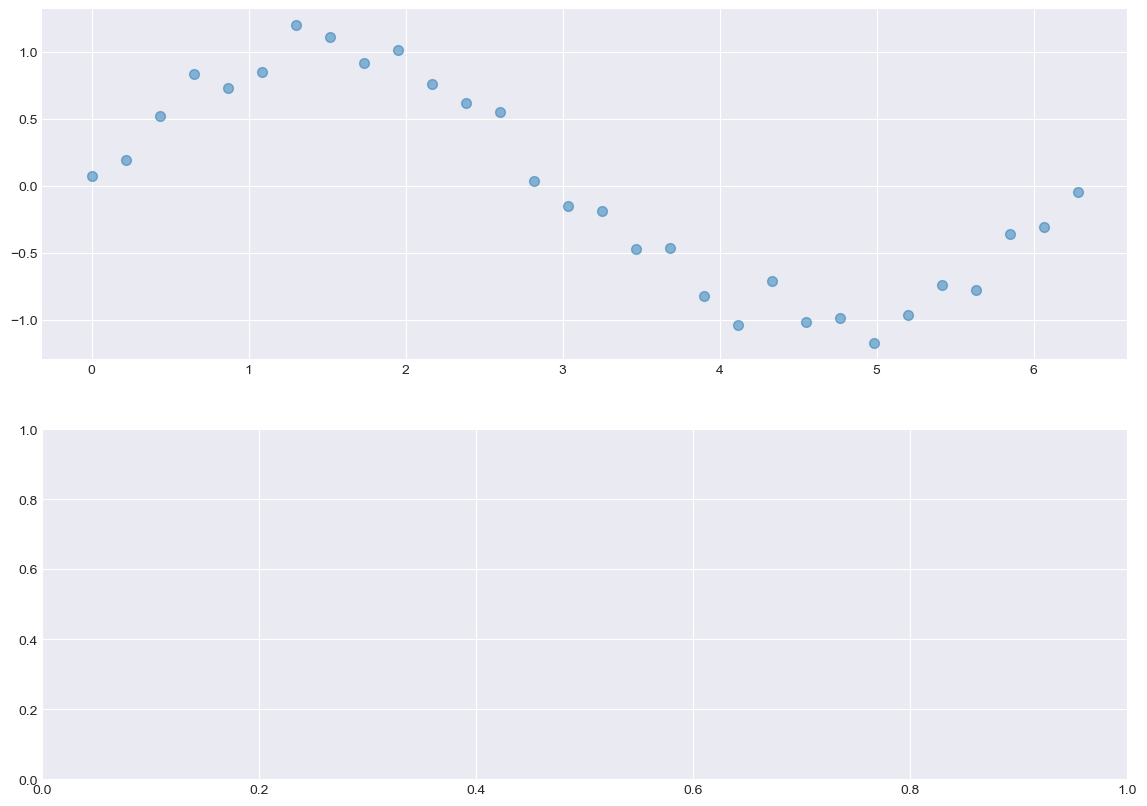

In [3]:
# Noisy data
np.random.seed(42)
x = np.linspace(0, 2*np.pi, 30)
y_true = np.sin(x)
y_noisy = y_true + np.random.randn(30) * 0.15

print("UnivariateSpline Features")
print("  Function: sin(x) with noise\n")

# Create smoothing spline (automatic s)
spl = interpolate.UnivariateSpline(x, y_noisy, s=None)

# Evaluate
x_fine = np.linspace(0, 2*np.pi, 300)
y_smooth = spl(x_fine)

# Derivative (should be ~cos(x))
spl_deriv = spl.derivative()
y_deriv = spl_deriv(x_fine)

# Integral
spl_integ = spl.integral(0, 2*np.pi)
true_integ = 0  # ∫sin(x)dx from 0 to 2π = 0

# Roots (zeros)
roots = spl.roots()

print("Spline operations:")
print(f"  Integral [0, 2π]: {spl_integ:.4f} (true: {true_integ})")
print(f"  Roots found: {len(roots)}")
print(f"  Root locations: {roots}")
print(f"  True roots: 0, π, 2π = 0, {np.pi:.4f}, {2*np.pi:.4f}")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Function
axes[0].scatter(x, y_noisy, alpha=0.5, s=50, label='Noisy data')
axes[0].plot(x_fine, y_true, 'g--', linewidth=2, alpha=0.7, label='True: sin(x)')
axes[0].plot(x_fine, y_smooth, 'r-', linewidth=2, label='Smoothed spline')
axes[0].plot(roots, spl(roots), 'ko', markersize=10, label=f'Roots ({len(roots)})')
axes[0].axhline(0, color='gray', linestyle='--', alpha=0.3)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title('Smoothing Spline', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Derivative
axes[1].plot(x_fine, y_deriv, 'r-', linewidth=2, label="Spline derivative")
axes[1].plot(x_fine, np.cos(x_fine), 'g--', linewidth=2, alpha=0.7,
            label='True: cos(x)')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel("y'", fontsize=12)
axes[1].set_title('Derivative (estimated from noisy data!)', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSplines enable derivative estimation from noisy data!")

## Real Example: Sensor Data Denoising

**Problem**: IoT sensor with measurement noise

**Data**: Temperature readings every 5 minutes

**Goal**: Extract true temperature trend

**Challenge**: Noise varies over time

**Solution**: Adaptive smoothing with weights

In [ ]:
# Simulate 24 hours of temperature data (every 5 min = 288 points)
np.random.seed(42)
n_points = 288
time_hours = np.linspace(0, 24, n_points)

# True temperature (daily cycle)
temp_true = 20 + 5*np.sin(2*np.pi*(time_hours - 6)/24)  # Peak at noon

# Time-varying noise (higher during day)
noise_level = 0.5 + 0.5*np.abs(np.sin(np.pi*time_hours/24))
noise = np.random.randn(n_points) * noise_level
temp_measured = temp_true + noise

print("IoT Sensor Data Denoising")
print(f"  Duration: 24 hours")
print(f"  Sampling: Every 5 minutes ({n_points} points)")
print(f"  Noise: Time-varying (0.5-1.0°C)\n")

# Weights (inverse of noise level = more trust where less noisy)
weights = 1 / (noise_level + 0.1)

# Smoothing splines
spl_no_weight = interpolate.UnivariateSpline(time_hours, temp_measured, s=50)
spl_weighted = interpolate.UnivariateSpline(time_hours, temp_measured, 
                                            w=weights, s=50)

# Evaluate
time_fine = np.linspace(0, 24, 1000)
temp_smooth_no_w = spl_no_weight(time_fine)
temp_smooth_w = spl_weighted(time_fine)
temp_true_fine = 20 + 5*np.sin(2*np.pi*(time_fine - 6)/24)

# Errors
error_no_w = np.sqrt(np.mean((temp_smooth_no_w - temp_true_fine)**2))
error_w = np.sqrt(np.mean((temp_smooth_w - temp_true_fine)**2))

print("Smoothing results:")
print(f"  Unweighted RMSE: {error_no_w:.3f}°C")
print(f"  Weighted RMSE: {error_w:.3f}°C")
print(f"  Improvement: {(error_no_w - error_w)/error_no_w * 100:.1f}%")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Temperature
axes[0].scatter(time_hours, temp_measured, alpha=0.3, s=10, 
               c=noise_level, cmap='Reds', label='Noisy measurements')
axes[0].plot(time_fine, temp_true_fine, 'g--', linewidth=3, 
            alpha=0.7, label='True temperature')
axes[0].plot(time_fine, temp_smooth_no_w, 'b-', linewidth=2,
            alpha=0.7, label='Unweighted smoothing')
axes[0].plot(time_fine, temp_smooth_w, 'r-', linewidth=2,
            label='Weighted smoothing (better!)')
axes[0].set_ylabel('Temperature (°C)', fontsize=12)
axes[0].set_title('Sensor Data Denoising', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Noise level and weights
ax2 = axes[1]
ax2.plot(time_hours, noise_level, 'r-', linewidth=2, label='Noise level')
ax2_twin = ax2.twinx()
ax2_twin.plot(time_hours, weights, 'b-', linewidth=2, label='Weights')
ax2.set_xlabel('Time (hours)', fontsize=12)
ax2.set_ylabel('Noise Level (°C)', fontsize=12, color='r')
ax2_twin.set_ylabel('Weight', fontsize=12, color='b')
ax2.set_title('Time-Varying Noise and Adaptive Weights', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')
ax2_twin.tick_params(axis='y', labelcolor='b')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nWeighted smoothing adapts to time-varying noise!")
print("Lower weights where noise is high.")

## B-Splines and Knots

**B-spline**: Basis spline representation
- More flexible than polynomial
- Local support (changing one point affects limited region)
- Controlled by knots

**Knots**: Points where spline pieces join
- More knots = more flexibility
- Knot spacing affects smoothness

**Functions**:
- `splrep(x, y, s)`: Create spline representation
- `splev(x, tck)`: Evaluate spline
- `tck`: (knots, coefficients, degree)

In [ ]:
# Data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([0, 3, 1, 4, 2, 5, 3, 6, 4])

print("B-Splines with Custom Knots\n")

# Automatic knots (smoothing spline)
tck_auto = interpolate.splrep(x, y, s=1)
knots_auto, coeffs_auto, degree_auto = tck_auto

print(f"Automatic knot selection:")
print(f"  Number of interior knots: {len(knots_auto) - 2*(degree_auto+1)}")
print(f"  Degree: {degree_auto}")
print(f"  Interior knots: {knots_auto[degree_auto+1:-degree_auto-1]}\n")

# Manual knots (uniform spacing)
knots_manual = np.linspace(x.min(), x.max(), 5)
tck_manual = interpolate.splrep(x, y, t=knots_manual[1:-1], k=3)

# Evaluate
x_fine = np.linspace(0, 8, 200)
y_auto = interpolate.splev(x_fine, tck_auto)
y_manual = interpolate.splev(x_fine, tck_manual)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Automatic knots
axes[0].plot(x, y, 'ro', markersize=10, label='Data', zorder=5)
axes[0].plot(x_fine, y_auto, 'b-', linewidth=2, label='Spline')
knots_interior_auto = knots_auto[degree_auto+1:-degree_auto-1]
for knot in knots_interior_auto:
    axes[0].axvline(knot, color='gray', linestyle='--', alpha=0.5)
axes[0].scatter(knots_interior_auto, 
               interpolate.splev(knots_interior_auto, tck_auto),
               c='green', s=100, marker='s', label='Knots', zorder=4)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].set_title(f'Automatic Knots ({len(knots_interior_auto)})', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Manual knots
axes[1].plot(x, y, 'ro', markersize=10, label='Data', zorder=5)
axes[1].plot(x_fine, y_manual, 'r-', linewidth=2, label='Spline')
for knot in knots_manual[1:-1]:
    axes[1].axvline(knot, color='gray', linestyle='--', alpha=0.5)
axes[1].scatter(knots_manual[1:-1],
               interpolate.splev(knots_manual[1:-1], tck_manual),
               c='green', s=100, marker='s', label='Knots', zorder=4)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('y', fontsize=12)
axes[1].set_title(f'Manual Knots ({len(knots_manual)-2})', fontsize=14)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Knot placement:")
print("  - More knots = more flexibility")
print("  - Automatic: Places knots where data varies most")
print("  - Manual: Full control over spline behavior")

## Real Example: Financial Time Series Smoothing

**Problem**: Stock prices are noisy, need trend

**Challenge**: Preserve important features (peaks, troughs)

**Solution**: Adaptive smoothing spline

**Application**: 
- Trend following strategies
- Support/resistance identification
- Derivative = momentum

In [ ]:
# Simulate stock price
np.random.seed(42)
days = np.arange(0, 252)  # Trading year

# Trend + cycles + noise
trend = 100 + 0.1*days
cycle = 10*np.sin(2*np.pi*days/50)
noise = np.random.randn(252) * 2
price = trend + cycle + noise

print("Stock Price Trend Extraction")
print(f"  252 trading days")
print(f"  Price range: ${price.min():.2f} - ${price.max():.2f}\n")

# Different smoothing levels
spl_tight = interpolate.UnivariateSpline(days, price, s=500)   # Tight
spl_medium = interpolate.UnivariateSpline(days, price, s=2000) # Medium
spl_loose = interpolate.UnivariateSpline(days, price, s=5000)  # Loose (trend)

# Evaluate
days_fine = np.linspace(0, 251, 1000)
price_tight = spl_tight(days_fine)
price_medium = spl_medium(days_fine)
price_loose = spl_loose(days_fine)

# Derivatives (momentum)
momentum_medium = spl_medium.derivative()(days_fine)

# Trading signals
# Buy when momentum > threshold, sell when < -threshold
threshold = 0.05
buy_signal = momentum_medium > threshold
sell_signal = momentum_medium < -threshold

print("Smoothing analysis:")
print(f"  Tight fit: Captures short-term moves")
print(f"  Medium fit: Balance (good for swing trading)")
print(f"  Loose fit: Long-term trend only")

# Visualize
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Prices and trends
axes[0].plot(days, price, 'gray', alpha=0.5, linewidth=1, label='Daily prices')
axes[0].plot(days_fine, price_tight, 'b-', linewidth=1.5, 
            alpha=0.7, label='Tight (s=500)')
axes[0].plot(days_fine, price_medium, 'g-', linewidth=2,
            label='Medium (s=2000) - trading signal')
axes[0].plot(days_fine, price_loose, 'r-', linewidth=2.5,
            alpha=0.8, label='Loose (s=5000) - trend')
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].set_title('Stock Price Smoothing: Different Time Horizons', fontsize=14)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Momentum (derivative)
axes[1].plot(days_fine, momentum_medium, 'b-', linewidth=2, label='Momentum')
axes[1].axhline(threshold, color='green', linestyle='--', 
               alpha=0.7, label=f'Buy threshold')
axes[1].axhline(-threshold, color='red', linestyle='--',
               alpha=0.7, label=f'Sell threshold')
axes[1].fill_between(days_fine, -1, 1, where=buy_signal,
                    alpha=0.2, color='green', label='Buy zone')
axes[1].fill_between(days_fine, -1, 1, where=sell_signal,
                    alpha=0.2, color='red', label='Sell zone')
axes[1].set_xlabel('Trading Day', fontsize=12)
axes[1].set_ylabel('Momentum ($/day)', fontsize=12)
axes[1].set_title('Momentum Trading Signals (from smooth derivative)', fontsize=14)
axes[1].legend(fontsize=11, loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSmoothing splines enable:")
print("  ✓ Trend extraction at different time scales")
print("  ✓ Momentum calculation from noisy prices")
print("  ✓ Trading signal generation")
print("  ✓ Support/resistance identification")

## Summary

### Interpolation vs Smoothing:

| Aspect | Interpolation | Smoothing |
|--------|--------------|----------|
| **Passes through points** | Yes (s=0) | No (s>0) |
| **Noise handling** | Fits all noise | Reduces noise |
| **Use when** | Clean data | Noisy data |
| **Oscillation** | Can be high | Controlled |

### Main Functions:

```python
from scipy.interpolate import UnivariateSpline, splrep, splev

# UnivariateSpline (recommended)
spl = UnivariateSpline(
    x, y,
    s=None,      # Smoothing: None=auto, 0=interpolate, >0=smooth
    w=None,      # Weights (1/sigma for each point)
    k=3          # Degree (3=cubic)
)

# Evaluate
y_smooth = spl(x_new)

# Derivatives and integrals
dy_dx = spl.derivative()(x_new)
integral = spl.integral(a, b)
roots = spl.roots()

# Lower-level interface
tck = splrep(x, y, s=1.0)  # t=knots, c=coeffs, k=degree
y_smooth = splev(x_new, tck)
```

### Smoothing Parameter s:

**Guidelines**:
- `s=0`: Interpolation (passes through all points)
- `s=None`: Automatic (uses data variance)
- `s=n`: Manual (n = number of points works well)
- `s=large`: Very smooth (trend only)

**Rule of thumb**: s ≈ n for typical noise

### When to Use Smoothing:

✓ **Noisy measurements**: Sensor data, experiments  
✓ **Trend extraction**: Financial data, time series  
✓ **Derivative estimation**: From noisy data  
✓ **Data compression**: Reduce storage  
✓ **Visualization**: Cleaner plots  

### Weighted Smoothing:

```python
# More trust where noise is low
weights = 1 / sigma  # sigma = noise estimate per point
spl = UnivariateSpline(x, y, w=weights, s=None)
```

### Applications:

- **Sensor networks**: Denoise temperature, pressure, etc.
- **Finance**: Trend extraction, momentum calculation
- **Signal processing**: Smoothing, filtering
- **Physics**: Experimental data analysis
- **Machine learning**: Feature engineering, preprocessing

### Best Practices:

✓ **Start with automatic s**: Let algorithm choose  
✓ **Use weights**: If noise varies across data  
✓ **Cross-validate**: Test different s values  
✓ **Check residuals**: Should look like noise  
✓ **Degree k=3**: Cubic is usually best  

### Common Pitfalls:

⚠️ **Over-smoothing**: Loses important features  
⚠️ **Under-smoothing**: Fits noise (like interpolation)  
⚠️ **Wrong weights**: Can distort result  
⚠️ **Extrapolation**: Unreliable beyond data range  

### Choosing s:

1. **s=None**: Start here (automatic)
2. **Visual check**: Plot and assess
3. **Cross-validation**: Split data, test on holdout
4. **Domain knowledge**: Physics constraints, etc.